In [293]:
import numpy as np
import matplotlib.pyplot as plt

In [294]:
input = np.array([[0,0],[0,1],[1,0],[1,1]])
output = np.array([[0,1,1,0]]).T

In [295]:
input_neurons = 2
k = hidden_neurons = 2
output_neurons = 1

In [296]:
#selecting k random centers
n = np.random.choice(len(input),size = k,replace = False)
centers = input[n,:]
centers

array([[0, 0],
       [1, 1]])

In [297]:
#standard deviation

dmax = -1
#max distance between 'k' cluster centers
for cluster1 in centers:
    for cluster2 in centers:
        dist = np.sqrt((cluster1[0] - cluster2[0])**2 + (cluster1[1] - cluster2[1])**2)
        if dist > dmax:
            dmax = dist

sd = dmax / np.sqrt(2 * k)
sd

0.7071067811865476

In [298]:
def rbf(x,c,sd):
    return np.exp(-1 * ((x[0] - c[0])**2 + (x[1] - c[1])**2) / (2 * (sd**2)))

In [299]:
def sigmoid(x, der=False):
    if der == False:
        return 1 / (1 + np.exp(-x))
    
    return x * (1 - x)

In [300]:
#input layer - hidden layer

transformed_input = []

for point in input:
    row = []
    for cluster in centers:
        row.append(rbf(point,cluster,sd))

    transformed_input.append(row)

transformed_input = np.array(transformed_input)
transformed_input

array([[1.        , 0.13533528],
       [0.36787944, 0.36787944],
       [0.36787944, 0.36787944],
       [0.13533528, 1.        ]])

In [301]:
#hidden layer - output layer

weights = np.random.random((hidden_neurons,output_neurons))
bias = np.random.random((1,output_neurons))

predicted = []

for epoch in range(10000):
    
    #feed forward
    weighted_sum = np.dot(transformed_input,weights) + bias     # 4 x 1    
    curr_output = sigmoid(weighted_sum)                        # 4 x 1

    #backpropagation
    error = output - curr_output                               # 4 x 1
    adjust = error * sigmoid(curr_output,True)                  # 4 x 1

    weights += np.dot(transformed_input.T,adjust)           # 2 x 1
    bias += np.sum(adjust,axis=0)
    
    predicted = curr_output

predicted

array([[0.030961  ],
       [0.96691969],
       [0.96691969],
       [0.030961  ]])

In [302]:
print(weights)
print(bias)

[[-17.06523205]
 [-17.06523205]]
[[15.93112855]]


In [303]:
#boundary line
# w1 x1 + w2 x2 + b = 0
# x2 = (- b - w1 x1)/w2

x2 = []
for i in range(len(input)):
    x2.append((- bias[0][0] - weights[0][0] * transformed_input[i][0]) / weights[1][0])

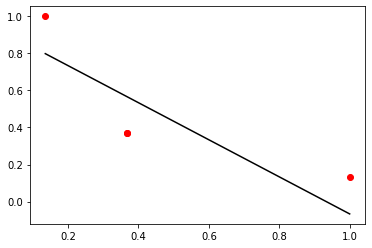

In [304]:
plt.scatter(transformed_input.T[0],transformed_input.T[1],color="#f00")
plt.plot(transformed_input.T[0],x2,color="#000")